In [1]:
%reset -f
import ROOT
from ROOT import TCanvas, TH1F, TH2F, TF1, TLatex
import numpy as np

def make_canvas(xdim=1000, ydim=1000, nrows=1, ncols=1):
  c1 = TCanvas("c1", "c1", xdim, ydim)
  c1.Divide(ncols, nrows)
  for i in range(nrows*ncols):
    c1.cd(i+1).SetGrid()
  c1.Draw()
  return c1

rdf = ROOT.RDataFrame("h22", "data/raw/lvl2_eppi0.inb.mc.root")
nevs = rdf.Count().GetValue() 
print(rdf.GetColumnNames())
print(nevs)

vals = "mm2,mm20,p0,p0theta,p0phi,eP,etheta,ephi,pP,ptheta,pphi,q2,t,dp,dmm2,p0_raw,pP_raw"
rdf = rdf.Define("vals", """
double emass = 0.000510999, promass = 0.938272081;
TLorentzVector beam, targ, ele, pro, pro0;
beam.SetXYZM(0, 0, 10.6041, emass);
targ.SetXYZM(0, 0, 0, promass);
ele.SetXYZM(ex, ey, ez, emass);
pro.SetXYZM(px, py, pz, promass);
pro0.SetXYZM(px0, py0, pz0, promass);

auto q2 = log(-(beam - ele).M2());
auto t = log(-(targ - pro).M2());

auto mm20 = (beam + targ - ele - pro0).M2();
auto mm2 = (beam + targ - ele - pro).M2();
auto p0 = pro0.P();
auto p0theta = pro0.Theta() * 180/3.14159;
auto p0phi = pro0.Phi() * 180/3.14159;

auto eP = ele.P();
auto etheta = ele.Theta() * 180/3.14159;
auto ephi = ele.Phi() * 180/3.14159;

auto pP = pro.P();
auto ptheta = pro.Theta() * 180/3.14159;
auto pphi = pro.Phi() * 180/3.14159;

auto p0_raw = p0;
auto pP_raw = pP;
eP = log(eP);
p0 = log(p0);
pP = log(pP);


auto dp = (p0 - pP);///pP;
auto dmm2 = (mm20 - mm2);///mm2;

return vector<double>{"""+vals+"};")
for i, val in enumerate(vals.split(',')):
  rdf = rdf.Define(val, f"vals[{i}]")

Welcome to JupyROOT 6.26/00
{ "esec", "ex", "ey", "ez", "g1x", "g1y", "g1z", "g2x", "g2y", "g2z", "idet", "ihel", "px", "px0", "py", "py0", "pz", "pz0", "run", "status" }
265928


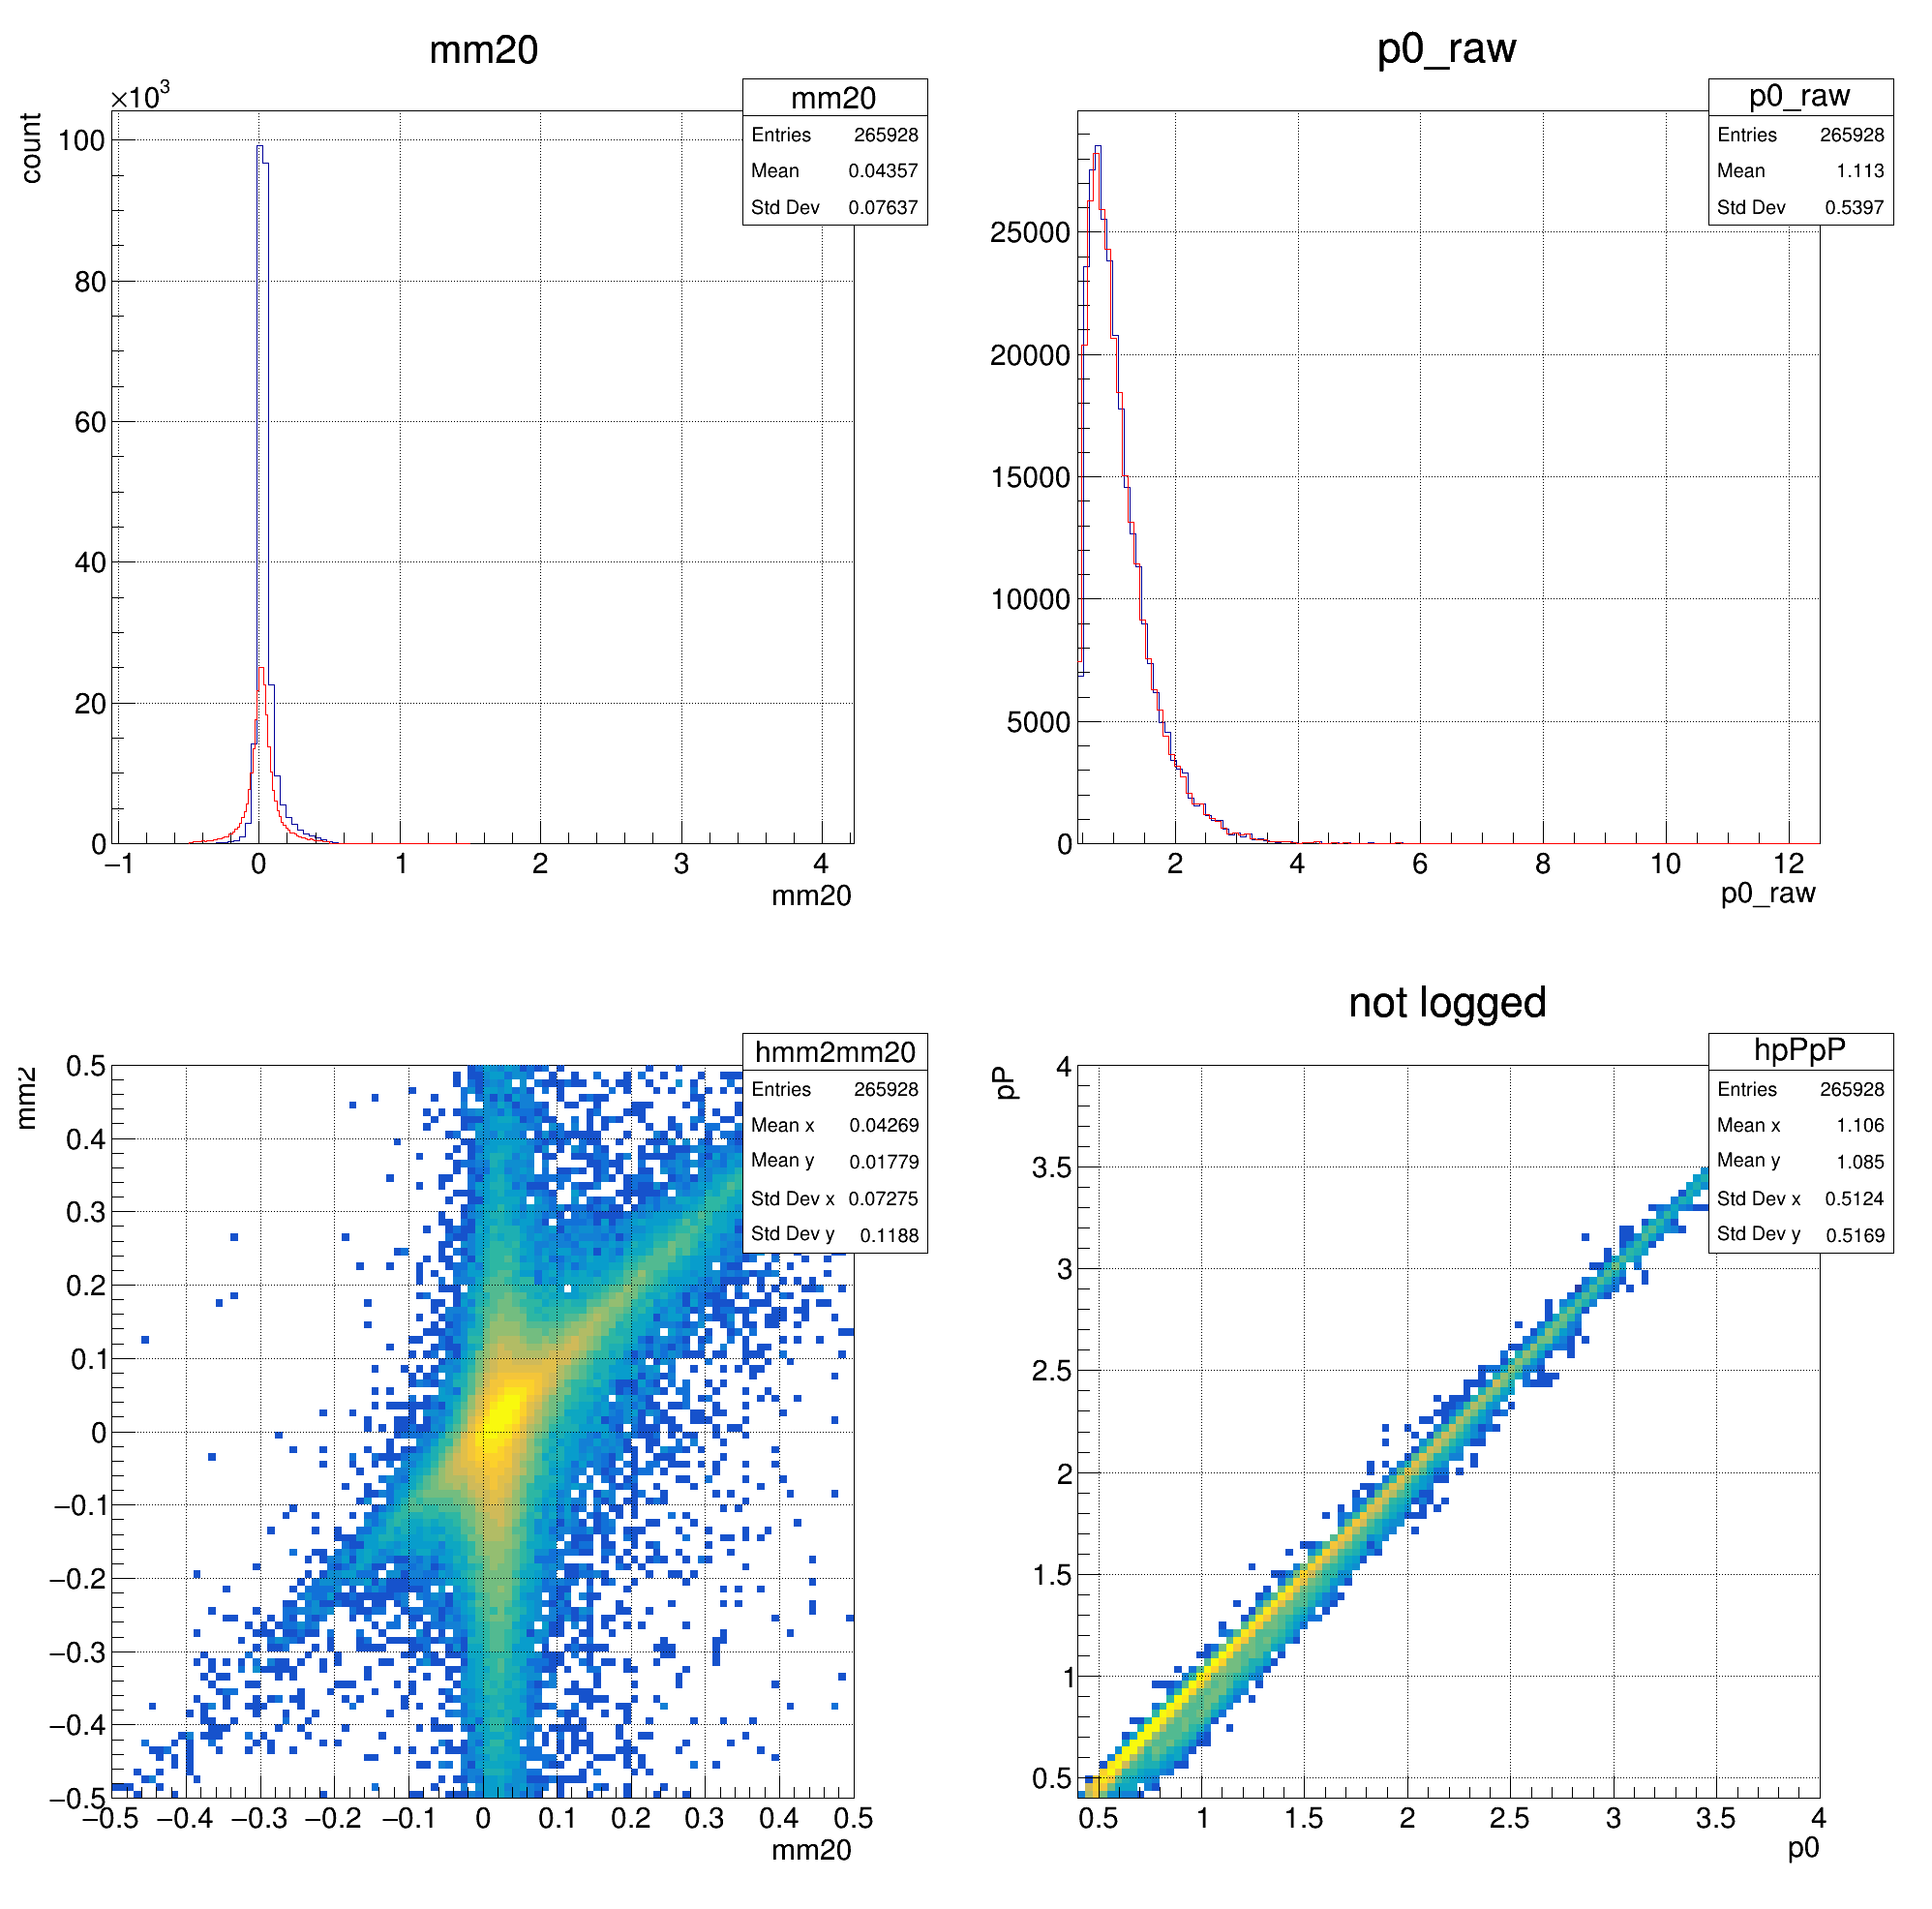

In [2]:
c1 = make_canvas(2000, 2000, 2, 2)
c1.cd(1)
hmm20 = rdf.Histo1D('mm20')
hmm2 = rdf.Histo1D('mm2')
hmm20.Draw()
hmm2.Draw('same')
hmm2.SetLineColor(ROOT.kRed)

c1.cd(2)
hp0 = rdf.Histo1D('p0_raw')
hp = rdf.Histo1D('pP_raw')
hp0.Draw()
hp.Draw('same')
hp.SetLineColor(ROOT.kRed)

c1.cd(3).SetLogz()
hmm2mm20 = rdf.Histo2D(('hmm2mm20', ';mm20;mm2', 100, -0.5, 0.5, 100, -0.5, 0.5), 'mm20', 'mm2')
hmm2mm20.Draw('col')

c1.cd(4).SetLogz()
hpPp0 = rdf.Histo2D(('hpPpP', 'not logged;p0;pP', 100, 0.4, 4, 100, 0.4, 4), 'p0_raw', 'pP_raw')
hpPp0.Draw('col')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


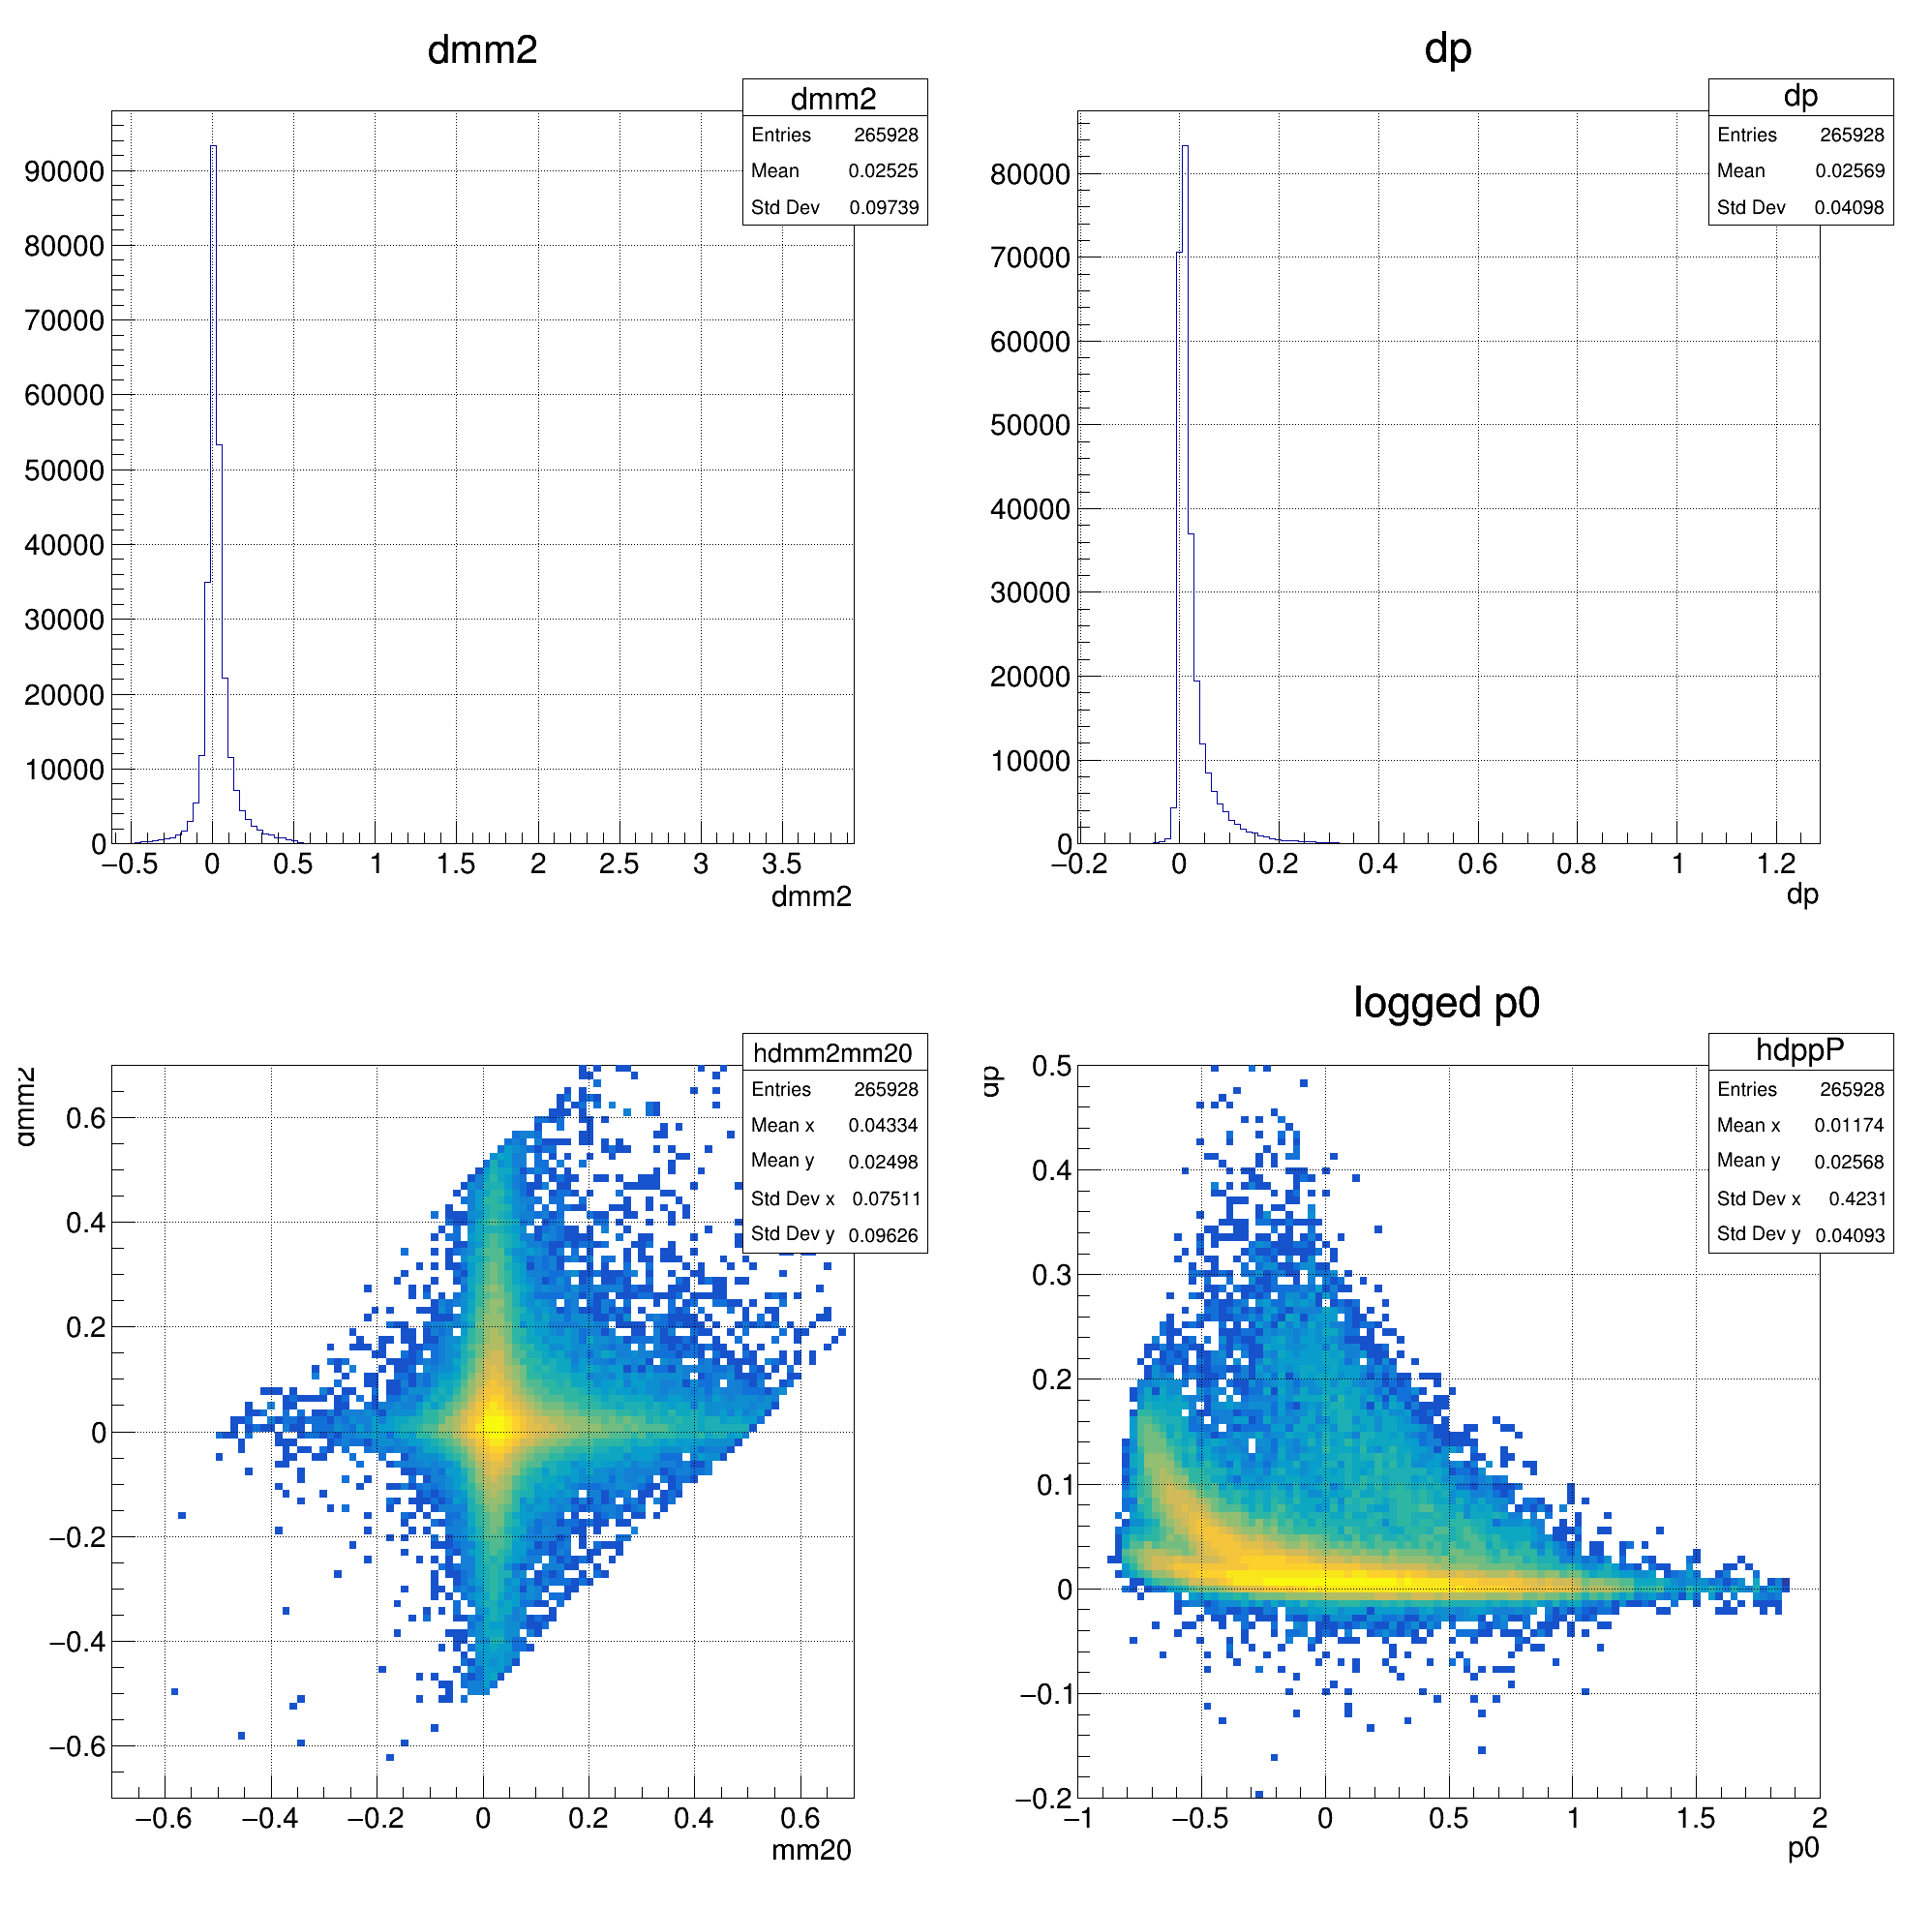

In [3]:
c1 = make_canvas(2000, 2000, 2, 2)
c1.cd(1)
hdmm2 = rdf.Histo1D('dmm2')
hdmm2.Draw()

c1.cd(2)
hdp = rdf.Histo1D('dp')
hdp.Draw()

c1.cd(3).SetLogz()
hmm2mm20 = rdf.Histo2D(('hdmm2mm20', ';mm20;dmm2', 100, -0.7, 0.7, 100, -0.7, 0.7), 'mm20', 'dmm2')
hmm2mm20.Draw('col')

c1.cd(4).SetLogz()
hpPp0 = rdf.Histo2D(('hdppP', 'logged p0;p0;dp', 100, -1, 2, 100, -0.2, 0.5), 'p0', 'dp')
hpPp0.Draw('col')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


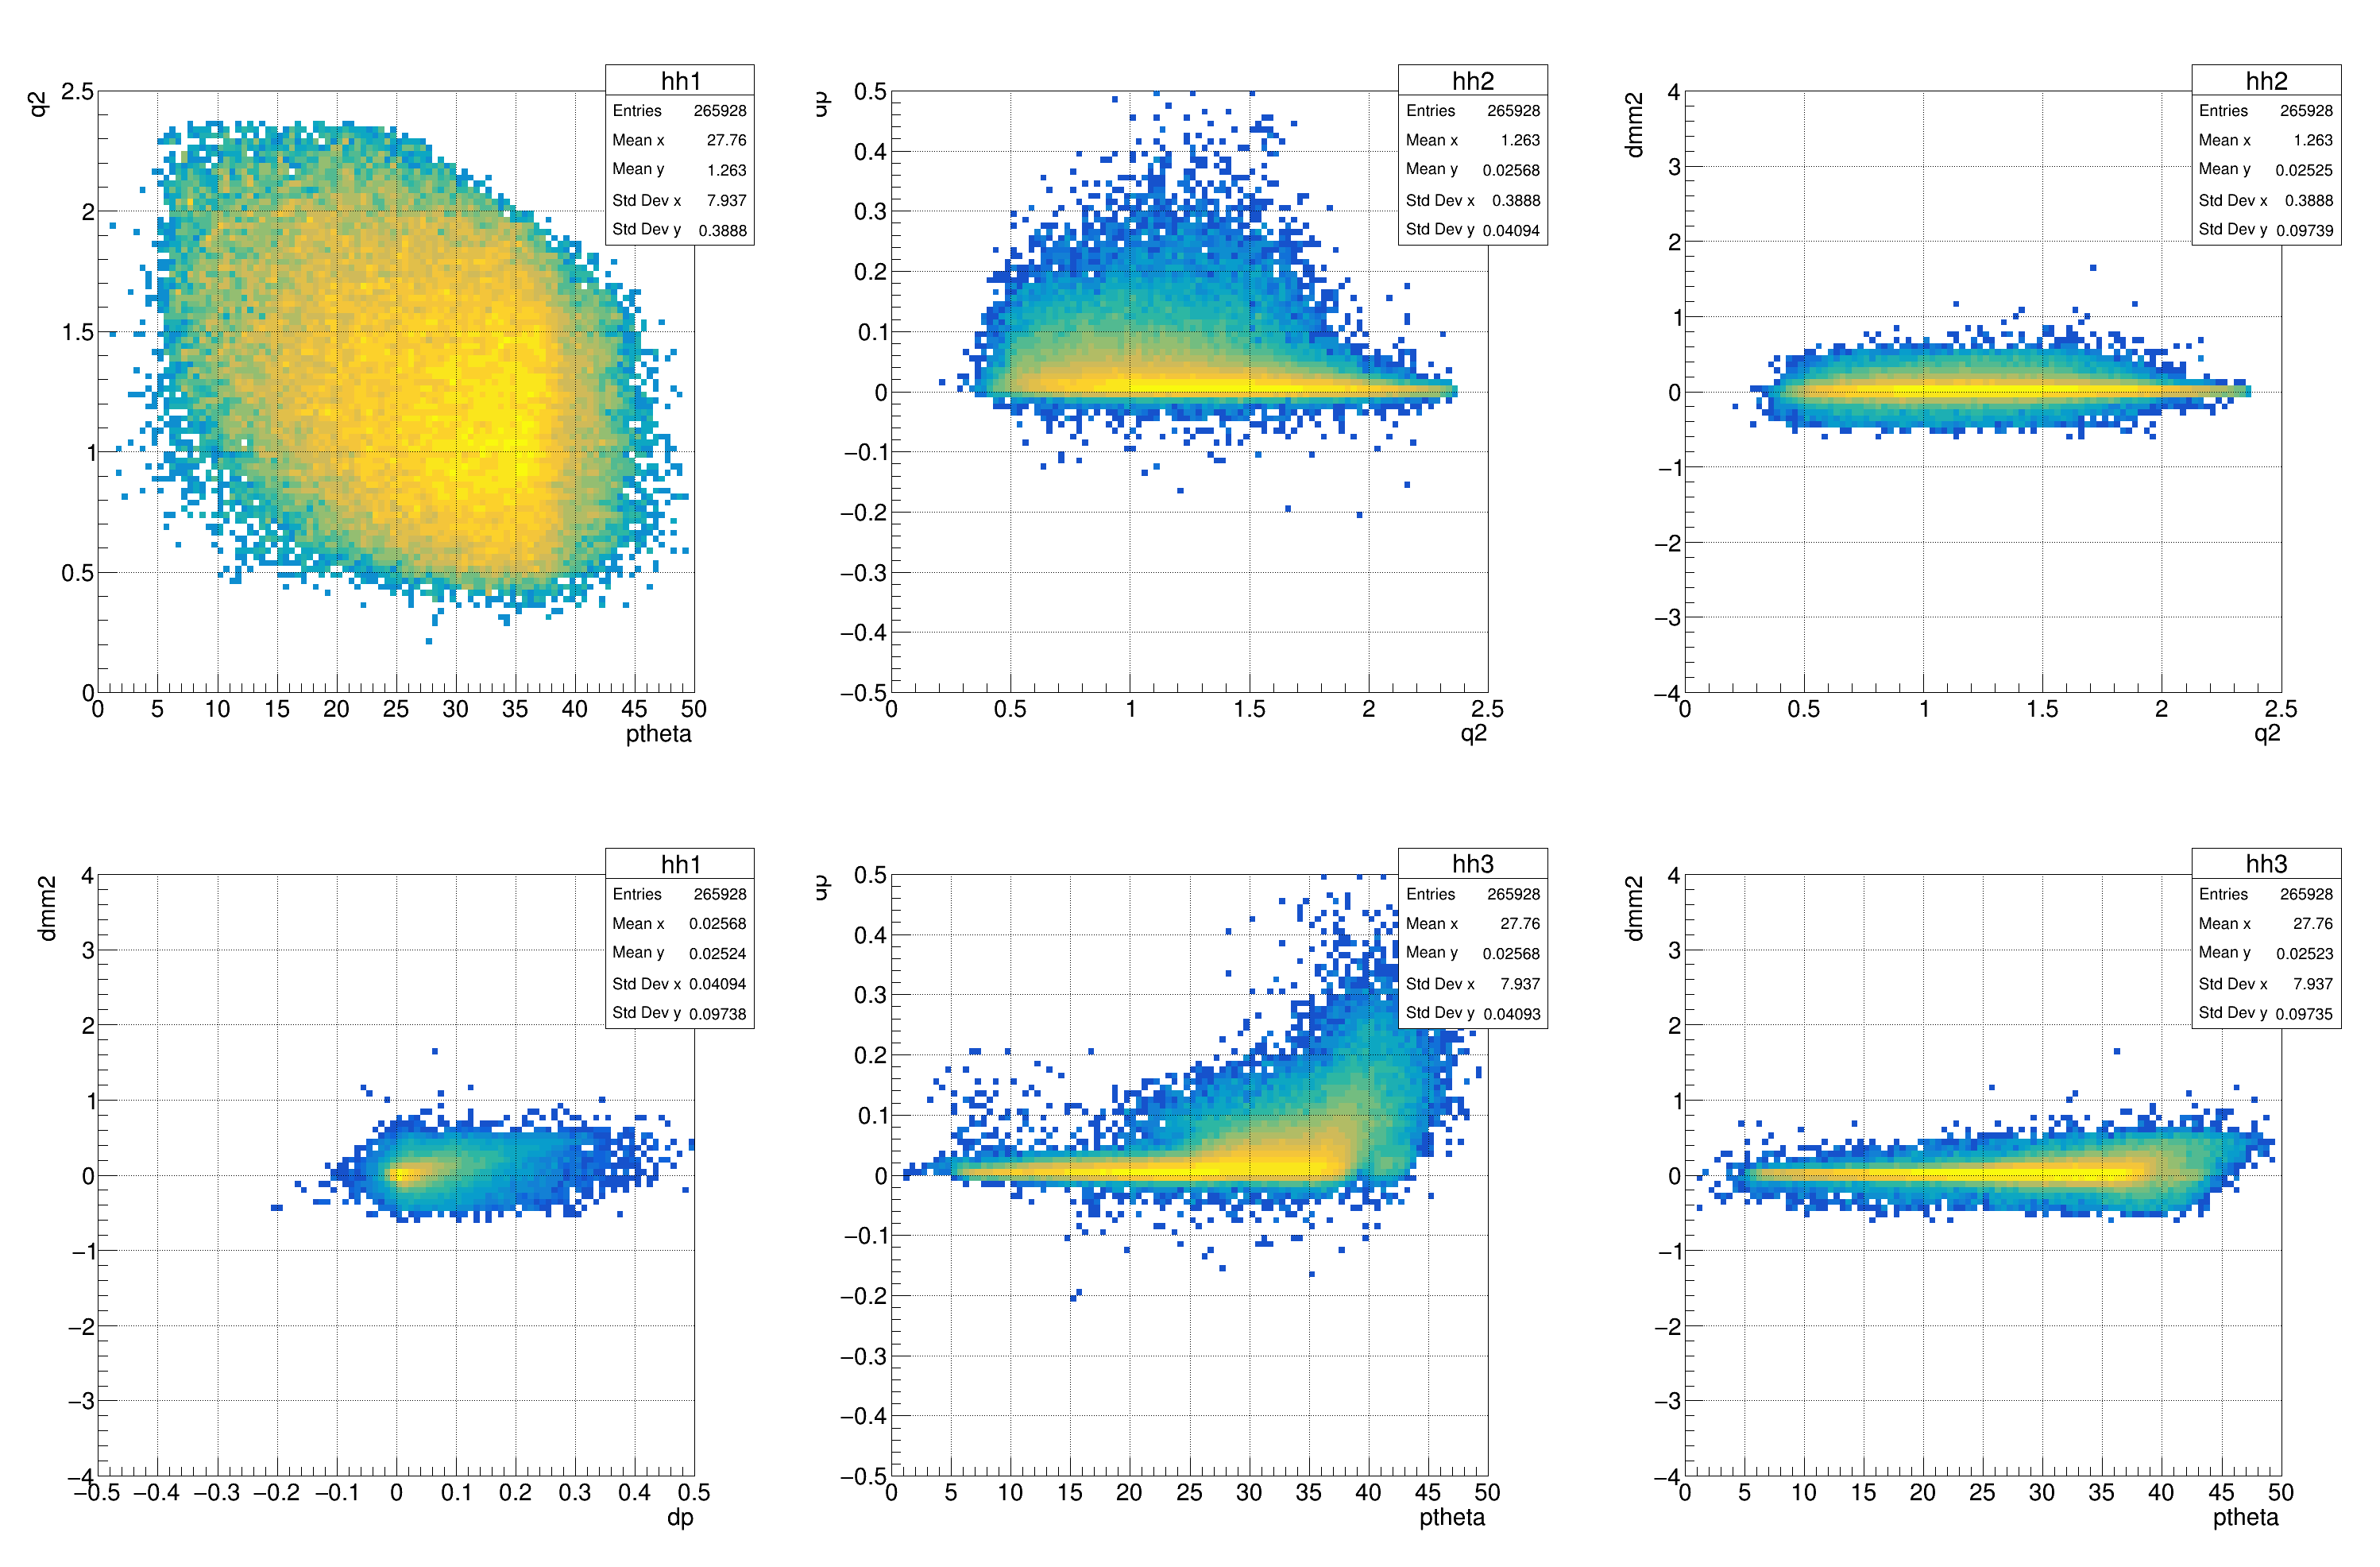

In [4]:
c1 = make_canvas(3000, 2000, 2, 3)

c1.cd(1).SetLogz()
hh1 = rdf.Histo2D(('hh1', ';ptheta;q2', 100, 0, 50, 100, 0, 2.5),     'ptheta', 'q2')
hh1.Draw('col')

c1.cd(2).SetLogz()
hh2 = rdf.Histo2D(('hh2', ';q2;dp',     100, 0, 2.5, 100, -0.5, 0.5), 'q2',     'dp')
hh2.Draw('col')

c1.cd(3).SetLogz()
hh3 = rdf.Histo2D(('hh2', ';q2;dmm2',   100, 0, 2.5, 100,   -4,   4), 'q2',     'dmm2')
hh3.Draw('col')

c1.cd(4).SetLogz()
hh4 = rdf.Histo2D(('hh1', ';dp;dmm2',     100, -0.5, 0.5, 100,   -4,   4), 'dp',     'dmm2')
hh4.Draw('col')

c1.cd(5).SetLogz()
hh5 = rdf.Histo2D(('hh3', ';ptheta;dp',   100,    0,  50, 100, -0.5, 0.5), 'ptheta', 'dp')
hh5.Draw('col')

c1.cd(6).SetLogz()
hh6 = rdf.Histo2D(('hh3', ';ptheta;dmm2', 100,    0,  50, 100,   -4,   4), 'ptheta', 'dmm2')
hh6.Draw('col')


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


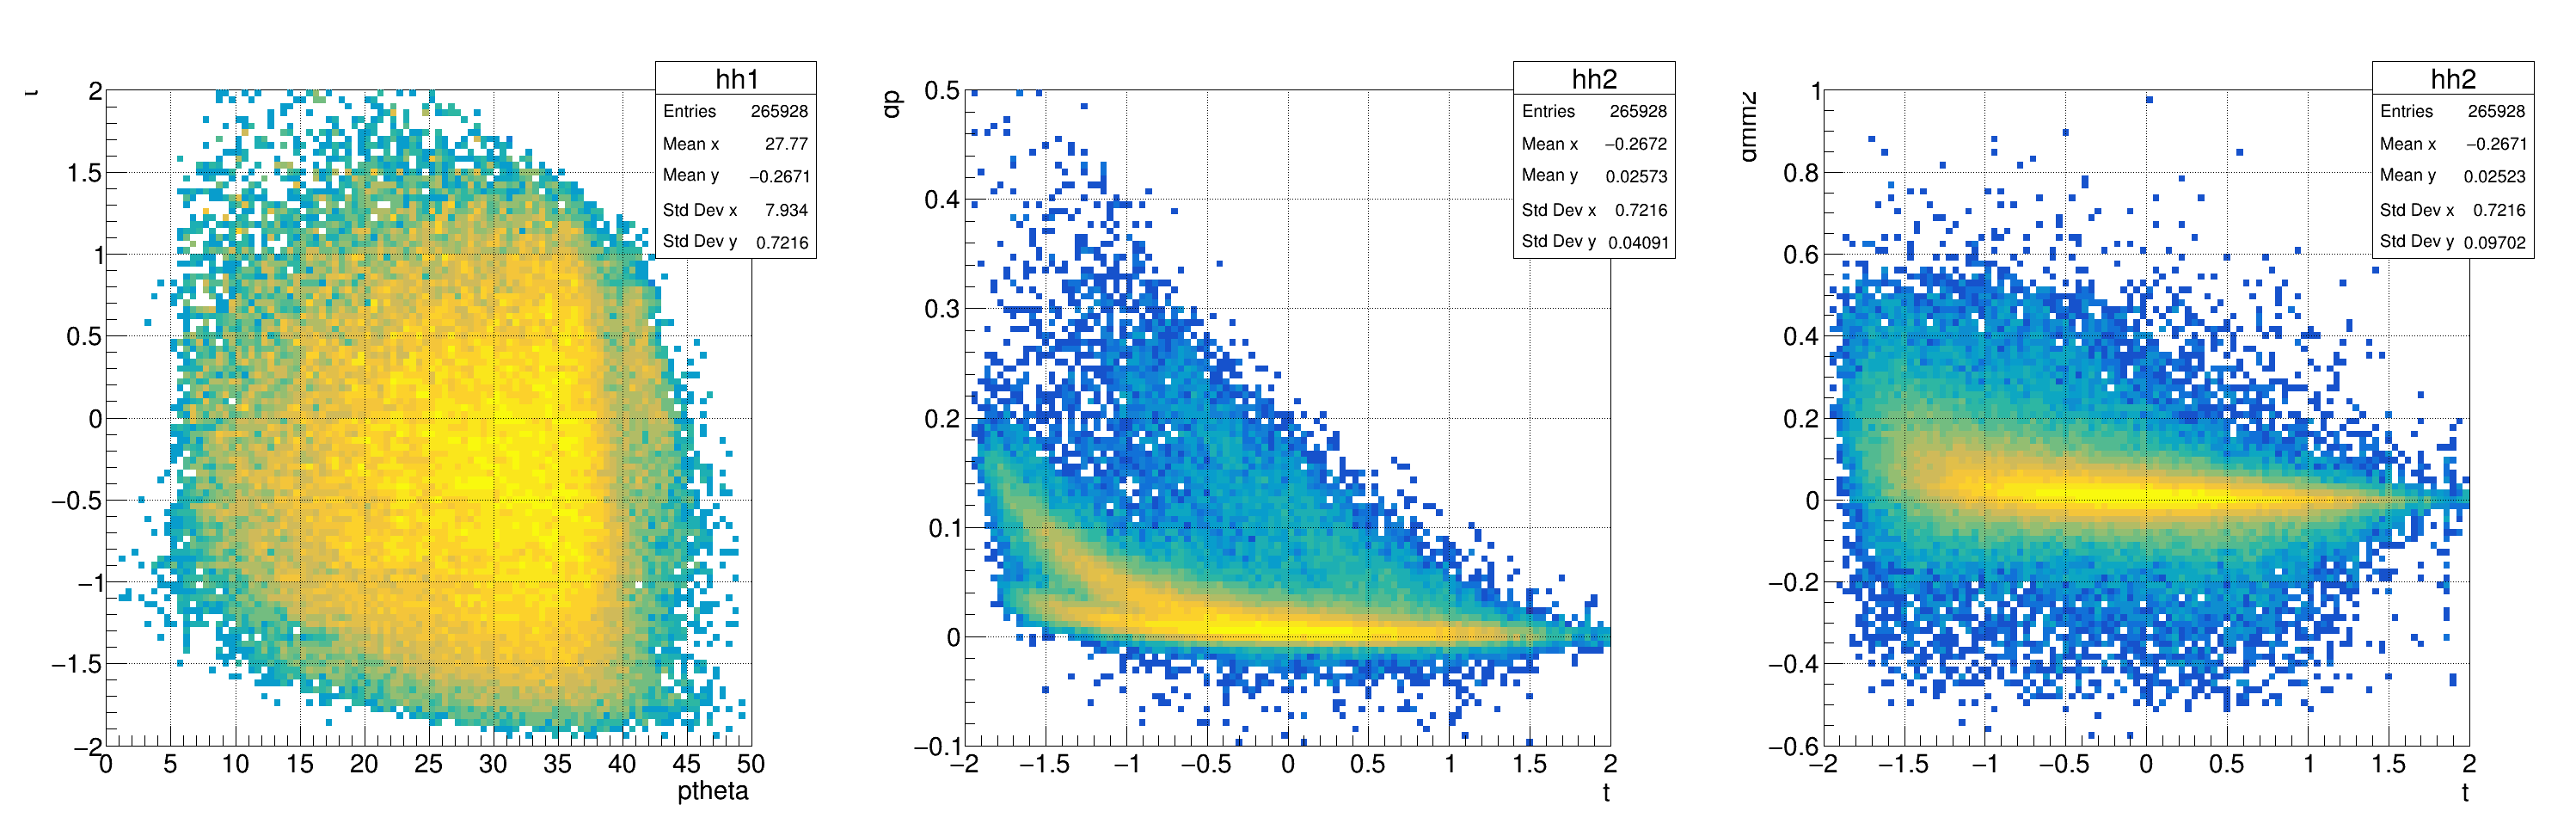

In [5]:
c1 = make_canvas(3000, 1000, 1, 3)

c1.cd(1).SetLogz()
hh1 = rdf.Histo2D(('hh1', ';ptheta;t', 100, 0, 50, 100, -2, 2),     'ptheta', 't')
hh1.Draw('col')

c1.cd(2).SetLogz()
hh2 = rdf.Histo2D(('hh2', ';t;dp',     100, -2, 2, 100, -0.1, 0.5), 't',     'dp')
hh2.Draw('col')

c1.cd(3).SetLogz()
hh3 = rdf.Histo2D(('hh2', ';t;dmm2',   100, -2, 2, 100,   -0.6,   1), 't',     'dmm2')
hh3.Draw('col')

# c1.cd(4).SetLogz()
# hh4 = rdf.Histo2D(('hh1', ';dp;dmm2',     100, -0.5, 0.5, 100, -0.5, 0.5), 'dp',     'dmm2')
# hh4.Draw('col')

# c1.cd(5).SetLogz()
# hh5 = rdf.Histo2D(('hh3', ';ptheta;dp',   100,    0,  50, 100, -0.5, 0.5), 'ptheta', 'dp')
# hh5.Draw('col')

# c1.cd(6).SetLogz()
# hh6 = rdf.Histo2D(('hh3', ';ptheta;dmm2', 100,    0,  50, 100, -0.5, 0.5), 'ptheta', 'dmm2')
# hh6.Draw('col')


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


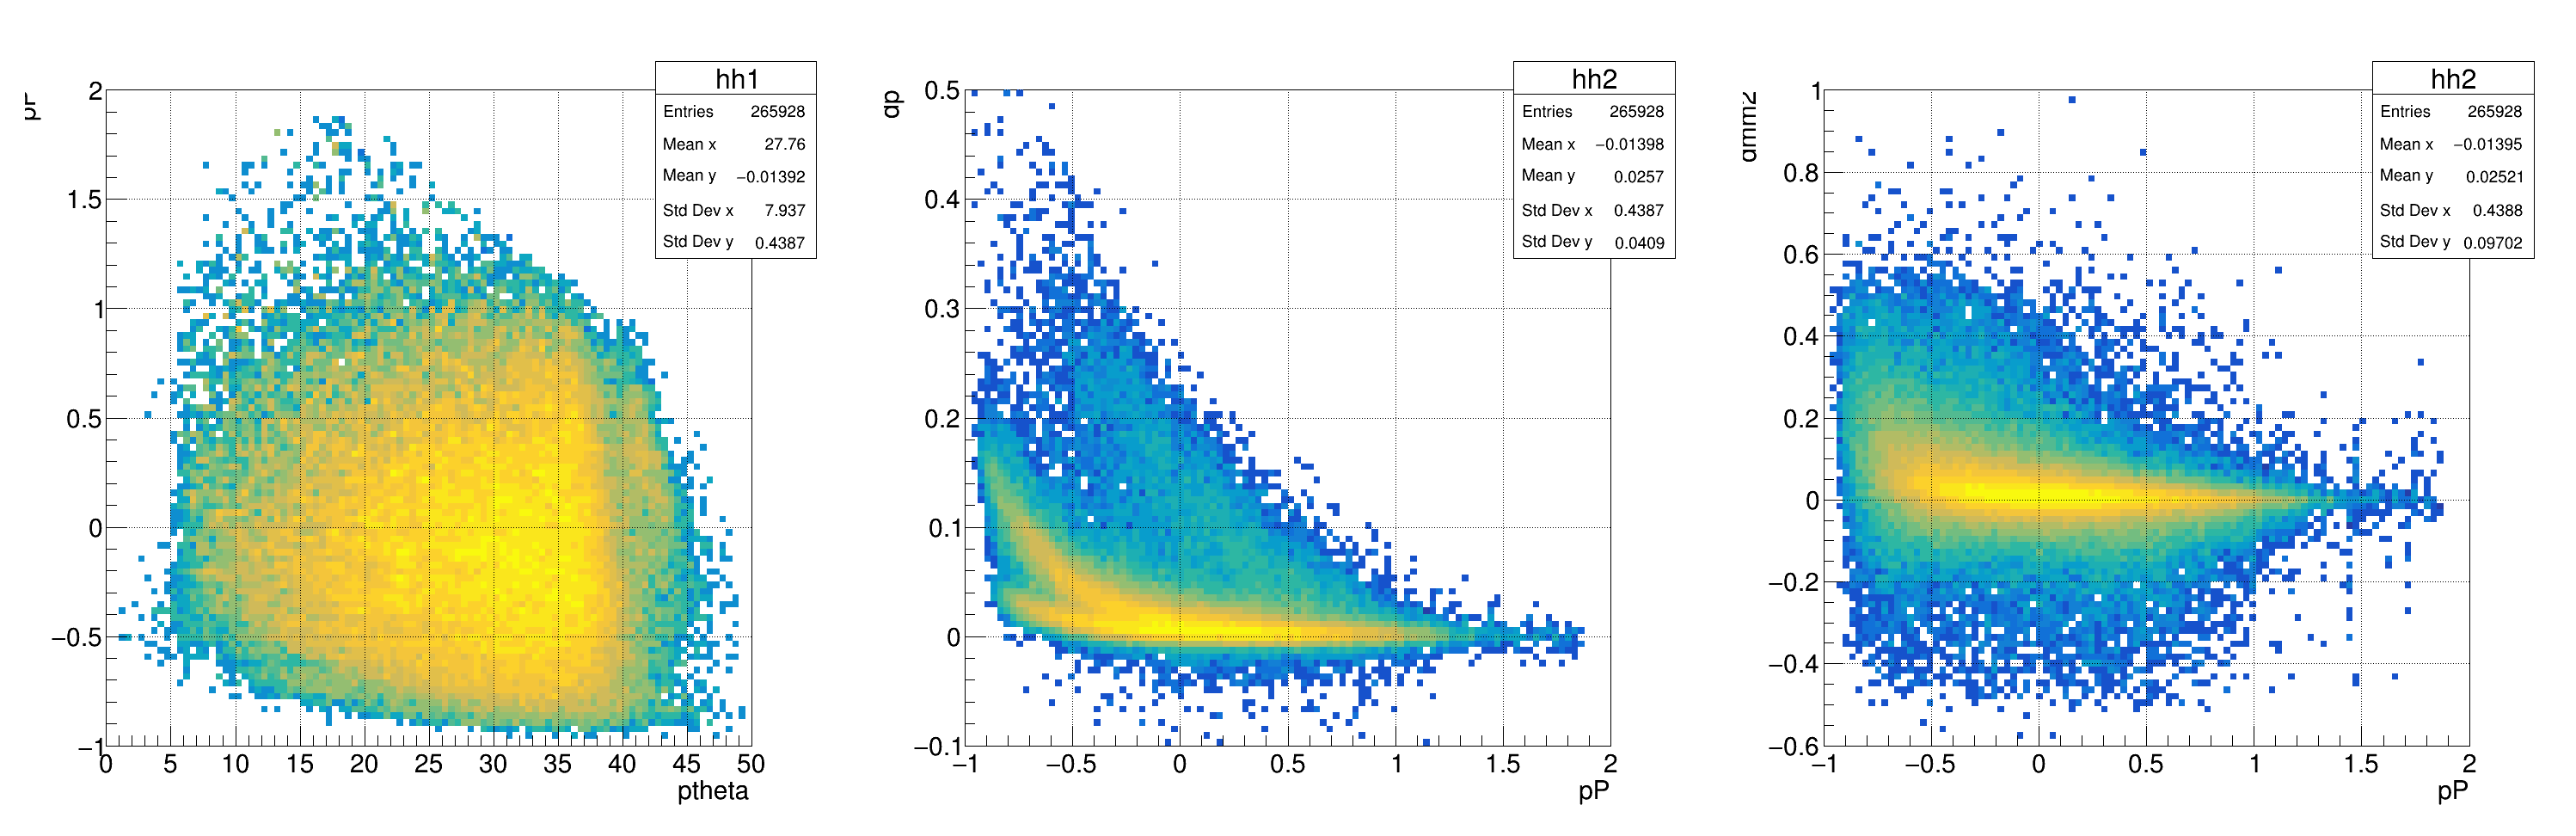

In [6]:
c1 = make_canvas(3000, 1000, 1, 3)

c1.cd(1).SetLogz()
hh1 = rdf.Histo2D(('hh1', ';ptheta;pP', 100, 0, 50, 100, -1, 2),     'ptheta', 'pP')
hh1.Draw('col')

c1.cd(2).SetLogz()
hh2 = rdf.Histo2D(('hh2', ';pP;dp',     100, -1, 2, 100, -0.1, 0.5), 'pP',     'dp')
hh2.Draw('col')

c1.cd(3).SetLogz()
hh3 = rdf.Histo2D(('hh2', ';pP;dmm2',   100, -1, 2, 100,   -0.6,   1), 'pP',     'dmm2')
hh3.Draw('col')

# c1.cd(4).SetLogz()
# hh4 = rdf.Histo2D(('hh1', ';dp;dmm2',     100, -0.5, 0.5, 100, -0.5, 0.5), 'dp',     'dmm2')
# hh4.Draw('col')

# c1.cd(5).SetLogz()
# hh5 = rdf.Histo2D(('hh3', ';ptheta;dp',   100,    0,  50, 100, -0.5, 0.5), 'ptheta', 'dp')
# hh5.Draw('col')

# c1.cd(6).SetLogz()
# hh6 = rdf.Histo2D(('hh3', ';ptheta;dmm2', 100,    0,  50, 100, -0.5, 0.5), 'ptheta', 'dmm2')
# hh6.Draw('col')

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


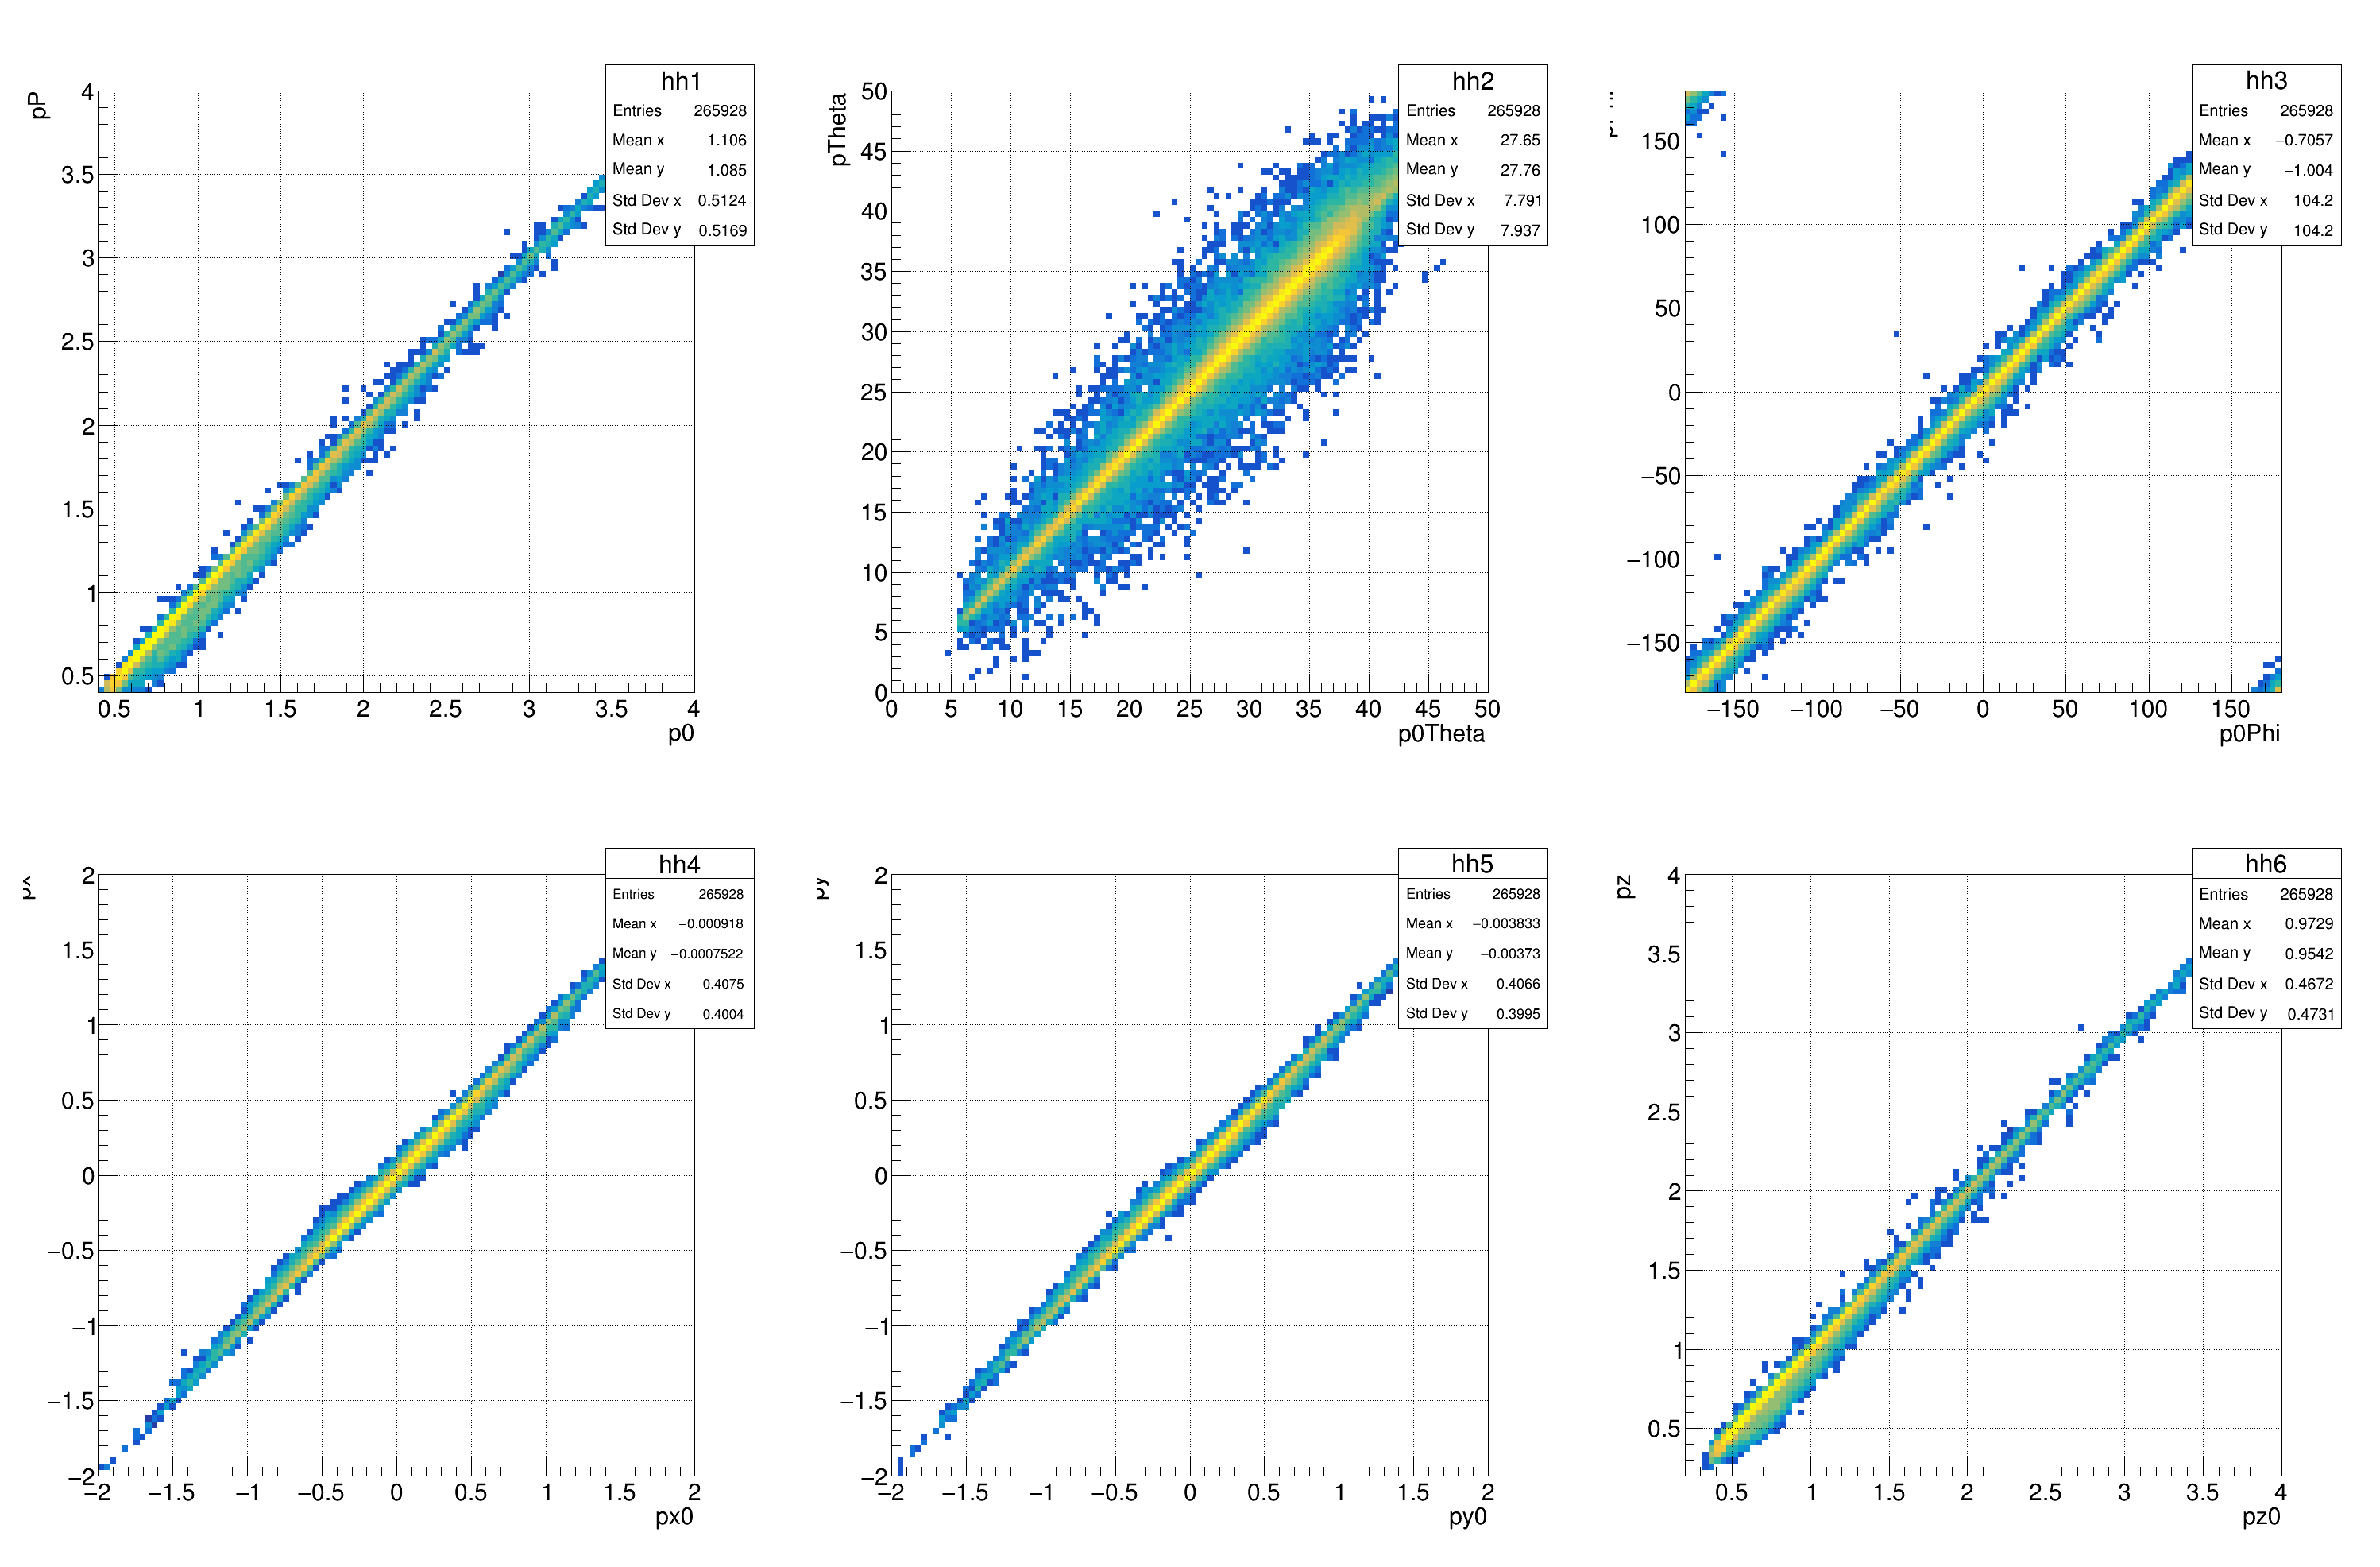

In [7]:
c1 = make_canvas(3000, 2000, 2, 3)

c1.cd(1).SetLogz()
hh1 = rdf.Histo2D(('hh1', ';p0;pP', 100, 0.4, 4, 100, 0.4, 4), 'p0_raw', 'pP_raw')
hh1.Draw('col')

c1.cd(2).SetLogz()
hh2 = rdf.Histo2D(('hh2', ';p0Theta;pTheta', 100, 0, 50, 100, 0, 50), 'p0theta', 'ptheta')
hh2.Draw('col')

c1.cd(3).SetLogz()
hh3 = rdf.Histo2D(('hh3', ';p0Phi;pPhi', 100, -180, 180, 100, -180, 180), 'p0phi', 'pphi')
hh3.Draw('col')

c1.cd(4).SetLogz()
hh4 = rdf.Histo2D(('hh4', ';px0;px', 100, -2, 2, 100, -2, 2), 'px0', 'px')
hh4.Draw('col')

c1.cd(5).SetLogz()
hh5 = rdf.Histo2D(('hh5', ';py0;py', 100, -2, 2, 100, -2, 2), 'py0', 'py')
hh5.Draw('col')

c1.cd(6).SetLogz()
hh6 = rdf.Histo2D(('hh6', ';pz0;pz', 100, 0.2, 4, 100, 0.2, 4), 'pz0', 'pz')
hh6.Draw('col')


In [12]:
import pandas as pd
feats = ["eP", "etheta", "ephi", "pP", "ptheta", "pphi", "q2", "t", "dp", "dmm2"]
df = pd.DataFrame(rdf.AsNumpy(feats))
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,eP,etheta,ephi,pP,ptheta,pphi,q2,t,dp,dmm2
eP,1,-0.865235,-0.0151899,-0.263347,-0.00258552,-0.00409004,-0.583368,-0.257358,0.00168459,0.0355551
etheta,-0.865235,1,0.0255313,0.355845,-0.20438,0.0129316,0.885035,0.352506,-0.136015,-0.0110696
ephi,-0.0151899,0.0255313,1,0.0021484,-0.0185389,-0.0961543,0.0361021,0.00231911,-0.01006,0.0105653
pP,-0.263347,0.355845,0.0021484,1,-0.0957325,0.0110095,0.382842,0.998255,-0.422417,-0.320344
ptheta,-0.00258552,-0.20438,-0.0185389,-0.0957325,1,-0.00216828,-0.316529,-0.0959901,0.464038,0.183855
pphi,-0.00409004,0.0129316,-0.0961543,0.0110095,-0.00216828,1,0.0185004,0.0102321,0.00238954,0.000596455
q2,-0.583368,0.885035,0.0361021,0.382842,-0.316529,0.0185004,1,0.38433,-0.217742,0.00851179
t,-0.257358,0.352506,0.00231911,0.998255,-0.0959901,0.0102321,0.38433,1,-0.435146,-0.328828
dp,0.00168459,-0.136015,-0.01006,-0.422417,0.464038,0.00238954,-0.217742,-0.435146,1,0.356048
dmm2,0.0355551,-0.0110696,0.0105653,-0.320344,0.183855,0.000596455,0.00851179,-0.328828,0.356048,1
